### OpenStreetMap

overpy: A Python wrapper for the Overpass API, which allows you to fetch OSM data for a given area and perform queries on the data.

This modified version of the extract_features function accepts an additional input parameter, distance, which allows the user to define the distance for the bounding box. The distance parameter has a default value of 50 km, which is used if no value is provided. If a location description is provided as input, the osmnx package is used to generate a bounding box from the location using the specified distance.

In [45]:
import osmnx as ox
import pandas as pd

# Set the location (latitude and longitude)
location = (38.64879, -77.29667)

# Download the OpenStreetMap data for the location, focusing on highway motorway_junctions
# Extract and plot highway motorway junctions within 400m from location of imagery from the number one accident location
mytags = {'highway': True, 'building': True, 'amenity': True, 'name': True, 'natural': True, 'landuse': True, 'height': True, 'area': True, 'source': True}

gdf = ox.geometries.geometries_from_point(location,tags = mytags, dist=100).reset_index()


USing OSM we can extract tagged features within a specified radius or within a specified area, such as an image. We can use these tags to support tagging imagery in an automated capacity. Once the imagery is tagged it could potionally be used in a ML or AI model that learns from the tagged imagery and then automattically genterates captions for new imagery.

In [51]:
# For each element type == node, concatenate the columns of the node's tags which are strings into a single string
gdf['tags'] = gdf.apply(lambda row: ' '.join([str(row[col]) for col in gdf.columns if row[col] is not None and type(row[col]) is str]), axis=1)

# Combine the tags of all elements into a single string
tagged_str = gdf['tags'].str.cat(sep=' ')

# For the name column, add additional 5 tags to the string 
tagged_str = tagged_str + ' ' + gdf['name'].str.cat(sep=' ')

# Convert the string to lowercase
tagged_str = tagged_str.lower()

# Remove way, node, and relation, yes, no, none from the string
tagged_str = tagged_str.replace('way', '').replace('node', '').replace('relation', '').replace('yes', '').replace('no', '').replace('none', '')

# Remove the numbers from the string
tagged_str = ''.join([i for i in tagged_str if not i.isdigit()])

# Remove the punctuation from the string
tagged_str = tagged_str.replace(',', '').replace('.', '').replace(';', '').replace(':', '').replace('(', '').replace(')', '').replace('=', '').replace('?', '').replace('!', '').replace('-', '').replace('_', '').replace('/', '').replace('"', '').replace("'", '')

# Remove the extra spaces from the string
tagged_str = ' '.join(tagged_str.split())

# Remove the words with less than 3 characters from the string
tagged_str = ' '.join([word for word in tagged_str.split() if len(word) > 2])

# Remove the words with more than 20 characters from the string
tagged_str = ' '.join([word for word in tagged_str.split() if len(word) < 20])

# Count how many unique words are in the string, print the top 20 words
tagged_str_counts = pd.Series(tagged_str.split()).value_counts()
tagged_str_counts.nunique()
tagged_str_counts.head(20)

# Count the unique word pairs in the string, print the top 20 word pairs
tagged_str_pairs_count = pd.Series([' '.join(pair) for pair in zip(tagged_str.split()[:-1], tagged_str.split()[1:])]).value_counts()
tagged_str_pairs_count.nunique()
tagged_str_pairs_count.head(20)

# Count the unique word trigrams in the string, print the top 20 word pairs
tagged_str_trigrams_count = pd.Series([' '.join(pair) for pair in zip(tagged_str.split()[:-2], tagged_str.split()[1:-1], tagged_str.split()[2:])]).value_counts()
tagged_str_trigrams_count.nunique()
tagged_str_trigrams_count.head(20)

permissive asphalt parkingaisle    60
service bing permissive            60
bing permissive asphalt            60
asphalt parkingaisle service       59
parkingaisle service bing          48
service survey permissive          24
permissive asphalt prince          24
asphalt prince william             24
survey permissive asphalt          24
prince william service             17
permissive asphalt drive           12
scale imagery permissive           12
imagery permissive asphalt         12
asphalt drive service              11
drive service survey               11
william service bing               11
parkingaisle service usgs          10
parkingaisle service survey         7
walmart supercenter walmart         6
commercial walmart supercenter      6
dtype: int64

/Users/gdhan/opt/anaconda3/lib/python3.9/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


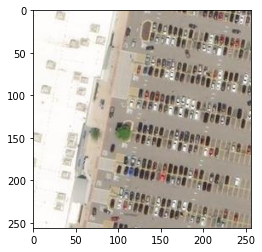

: 

In [60]:

# plot a .tif image onto the map of the nodes
import rasterio
import rasterio.plot
import matplotlib.pyplot as plt

# Set the location of the .tif image
image_path = '/Users/gdhan/Documents/Data Science/Python/Car_Accidents/74786_100514_18.tif'

# Open the .tif image
with rasterio.open(image_path) as src:
    # Plot the image
    rasterio.plot.show(src)


<AxesSubplot:>

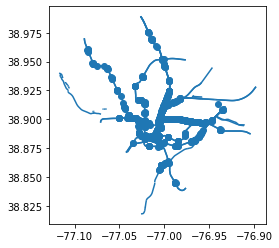

In [ ]:
# Extract all geometries associated with a railway in DC
gdf = ox.geometries.geometries_from_place(query='Washington DC', tags={'railway':True})
gdf.plot()

<AxesSubplot:>

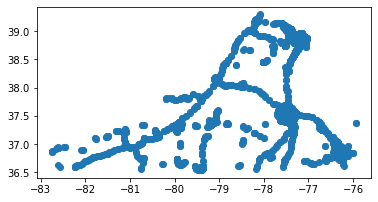

In [ ]:
#extract all motorway junctions in virginia, perhaps a 3d array model could take motorway junction as an input
#this in raster form becomes a predictor or feature for predicting car accidents
gdf = ox.geometries.geometries_from_place(query='Virginia', tags={'highway':'motorway_junction'})
gdf.plot()

<AxesSubplot:>

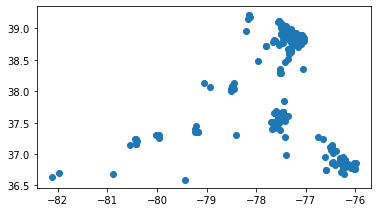

In [ ]:
#extract all motorway junctions in virginia, perhaps a 3d array model could take motorway junction as an input
#this in raster form becomes a predictor or feature for predicting car accidents
gdf = ox.geometries.geometries_from_place(query='Virginia', tags={'name':'Starbucks'})
gdf.plot()

In [58]:
gdf

,element_type,osmid,highway,source,geometry,power,access,amenity,entrance,nodes,...,operator:wikidata,operator:wikipedia,phone,ref:walmart,shop,website,cables,voltage,wires,tags
0,node,6020398719,NaN,NaN,POINT (-77.29754 38.64932),NaN,private,loading_dock,service,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,node private loading_dock service node private...
1,way,20419229,service,bing,"LINESTRING (-77.29343 38.64654, -77.29341 38.6...",NaN,permissive,NaN,NaN,"[217868971, 217868974, 217868977, 217868980, 2...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,way service bing permissive no no asphalt A41 ...
2,way,20420277,service,bing,"LINESTRING (-77.29667 38.64807, -77.29567 38.6...",NaN,permissive,NaN,NaN,"[217869068, 4288717482, 217887881, 217887885, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,way service bing permissive no no asphalt A41 ...
3,way,20423479,service,USGS arge Scale Imagery,"LINESTRING (-77.29753 38.64954, -77.29751 38.6...",NaN,permissive,NaN,NaN,"[217943870, 3877493388, 217943871]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,way service USGS arge Scale Imagery permissive...
4,way,20435008,service,survey,"LINESTRING (-77.29836 38.64952, -77.29825 38.6...",NaN,permissive,NaN,NaN,"[218115555, 9641746254, 218115558, 3877493367,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,way service survey permissive no no asphalt A4...
5,way,94046177,NaN,NaN,"POLYGON ((-77.29689 38.64938, -77.29646 38.649...",NaN,customers,parking,NaN,"[1093077290, 4288717531, 1093077079, 109307785...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,way customers parking surface way customers pa...
6,way,94046191,NaN,NaN,"POLYGON ((-77.29761 38.64936, -77.29754 38.649...",NaN,NaN,NaN,NaN,"[1093077759, 2933698180, 6020398719, 293369817...",...,Q483551,en:Walmart,+1-703-497-2590,1852,supermarket,https://www.walmart.com/store/1852/woodbridge-...,NaN,NaN,NaN,way Woodbridge US 14000 22192 VA Worth Avenue ...
7,way,94046208,NaN,NaN,"POLYGON ((-77.29697 38.65037, -77.29679 38.650...",NaN,NaN,NaN,NaN,"[1093078155, 3783591343, 3783591353, 387671192...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,way yes way yes way yes way yes way yes way yes
8,way,384460391,service,survey,"LINESTRING (-77.29670 38.64953, -77.29672 38.6...",NaN,permissive,NaN,NaN,"[3877493364, 3877493371]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,way service survey permissive no no asphalt dr...
9,way,384460392,service,survey,"LINESTRING (-77.29536 38.65017, -77.29541 38.6...",NaN,permissive,NaN,NaN,"[3877493361, 3877493379, 3877493378, 387749336...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,way service survey permissive no no asphalt pa...
